In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from numpy import genfromtxt
from sklearn.datasets import load_boston

In [2]:
def read_dataset(filePath,delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)

def read_boston_data():
    boston = load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    return features, labels

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def append_bias_reshape(features,labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    l = np.reshape(labels,[n_training_samples,1])
    return f, l

In [3]:
features,labels = read_boston_data()

In [4]:
features

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
labels

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
normalized_features = feature_normalize(features)

In [7]:
normalized_features

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [8]:
normalized_features.shape

(506, 13)

In [9]:
labels.shape

(506,)

In [10]:
features.shape[0]

506

In [11]:
f, l = append_bias_reshape(normalized_features,labels)
n_dim = f.shape[1]

In [12]:
l.shape

(506, 1)

In [13]:
f.shape

(506, 14)

In [14]:
f

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [ 1.        , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [ 1.        , -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [15]:
rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

In [16]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
W.shape

TensorShape([Dimension(14), Dimension(1)])

In [18]:
init = tf.initialize_all_variables()

y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [19]:
for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))
    pred_y = sess.run(y_, feed_dict={X: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    print("epochs = ", epoch, "MSE: %.4f" % sess.run(mse))

epochs =  0 MSE: 577.4871
epochs =  1 MSE: 542.5682
epochs =  2 MSE: 511.8917
epochs =  3 MSE: 484.6521
epochs =  4 MSE: 460.2204
epochs =  5 MSE: 438.1035
epochs =  6 MSE: 417.9140
epochs =  7 MSE: 399.3461
epochs =  8 MSE: 382.1571
epochs =  9 MSE: 366.1536
epochs =  10 MSE: 351.1805
epochs =  11 MSE: 337.1124
epochs =  12 MSE: 323.8474
epochs =  13 MSE: 311.3020
epochs =  14 MSE: 299.4071
epochs =  15 MSE: 288.1048
epochs =  16 MSE: 277.3464
epochs =  17 MSE: 267.0906
epochs =  18 MSE: 257.3016
epochs =  19 MSE: 247.9483
epochs =  20 MSE: 239.0035
epochs =  21 MSE: 230.4432
epochs =  22 MSE: 222.2455
epochs =  23 MSE: 214.3913
epochs =  24 MSE: 206.8626
epochs =  25 MSE: 199.6432
epochs =  26 MSE: 192.7184
epochs =  27 MSE: 186.0742
epochs =  28 MSE: 179.6977
epochs =  29 MSE: 173.5770
epochs =  30 MSE: 167.7007
epochs =  31 MSE: 162.0583
epochs =  32 MSE: 156.6397
epochs =  33 MSE: 151.4355
epochs =  34 MSE: 146.4365
epochs =  35 MSE: 141.6344
epochs =  36 MSE: 137.0209
epochs =  3

epochs =  307 MSE: 19.3901
epochs =  308 MSE: 19.3824
epochs =  309 MSE: 19.3748
epochs =  310 MSE: 19.3673
epochs =  311 MSE: 19.3598
epochs =  312 MSE: 19.3524
epochs =  313 MSE: 19.3449
epochs =  314 MSE: 19.3376
epochs =  315 MSE: 19.3302
epochs =  316 MSE: 19.3229
epochs =  317 MSE: 19.3157
epochs =  318 MSE: 19.3085
epochs =  319 MSE: 19.3013
epochs =  320 MSE: 19.2942
epochs =  321 MSE: 19.2870
epochs =  322 MSE: 19.2800
epochs =  323 MSE: 19.2730
epochs =  324 MSE: 19.2660
epochs =  325 MSE: 19.2590
epochs =  326 MSE: 19.2521
epochs =  327 MSE: 19.2452
epochs =  328 MSE: 19.2384
epochs =  329 MSE: 19.2316
epochs =  330 MSE: 19.2248
epochs =  331 MSE: 19.2181
epochs =  332 MSE: 19.2114
epochs =  333 MSE: 19.2047
epochs =  334 MSE: 19.1981
epochs =  335 MSE: 19.1915
epochs =  336 MSE: 19.1850
epochs =  337 MSE: 19.1784
epochs =  338 MSE: 19.1720
epochs =  339 MSE: 19.1655
epochs =  340 MSE: 19.1591
epochs =  341 MSE: 19.1527
epochs =  342 MSE: 19.1463
epochs =  343 MSE: 19.1400
e

epochs =  613 MSE: 18.1756
epochs =  614 MSE: 18.1737
epochs =  615 MSE: 18.1718
epochs =  616 MSE: 18.1699
epochs =  617 MSE: 18.1680
epochs =  618 MSE: 18.1662
epochs =  619 MSE: 18.1643
epochs =  620 MSE: 18.1625
epochs =  621 MSE: 18.1607
epochs =  622 MSE: 18.1588
epochs =  623 MSE: 18.1570
epochs =  624 MSE: 18.1552
epochs =  625 MSE: 18.1534
epochs =  626 MSE: 18.1516
epochs =  627 MSE: 18.1498
epochs =  628 MSE: 18.1480
epochs =  629 MSE: 18.1462
epochs =  630 MSE: 18.1444
epochs =  631 MSE: 18.1427
epochs =  632 MSE: 18.1409
epochs =  633 MSE: 18.1392
epochs =  634 MSE: 18.1374
epochs =  635 MSE: 18.1357
epochs =  636 MSE: 18.1339
epochs =  637 MSE: 18.1322
epochs =  638 MSE: 18.1305
epochs =  639 MSE: 18.1288
epochs =  640 MSE: 18.1271
epochs =  641 MSE: 18.1254
epochs =  642 MSE: 18.1237
epochs =  643 MSE: 18.1220
epochs =  644 MSE: 18.1203
epochs =  645 MSE: 18.1186
epochs =  646 MSE: 18.1169
epochs =  647 MSE: 18.1153
epochs =  648 MSE: 18.1136
epochs =  649 MSE: 18.1120
e

epochs =  917 MSE: 17.8248
epochs =  918 MSE: 17.8241
epochs =  919 MSE: 17.8234
epochs =  920 MSE: 17.8228
epochs =  921 MSE: 17.8221
epochs =  922 MSE: 17.8214
epochs =  923 MSE: 17.8208
epochs =  924 MSE: 17.8201
epochs =  925 MSE: 17.8194
epochs =  926 MSE: 17.8188
epochs =  927 MSE: 17.8181
epochs =  928 MSE: 17.8175
epochs =  929 MSE: 17.8168
epochs =  930 MSE: 17.8162
epochs =  931 MSE: 17.8155
epochs =  932 MSE: 17.8149
epochs =  933 MSE: 17.8142
epochs =  934 MSE: 17.8136
epochs =  935 MSE: 17.8129
epochs =  936 MSE: 17.8123
epochs =  937 MSE: 17.8116
epochs =  938 MSE: 17.8110
epochs =  939 MSE: 17.8104
epochs =  940 MSE: 17.8097
epochs =  941 MSE: 17.8091
epochs =  942 MSE: 17.8085
epochs =  943 MSE: 17.8078
epochs =  944 MSE: 17.8072
epochs =  945 MSE: 17.8066
epochs =  946 MSE: 17.8060
epochs =  947 MSE: 17.8054
epochs =  948 MSE: 17.8047
epochs =  949 MSE: 17.8041
epochs =  950 MSE: 17.8035
epochs =  951 MSE: 17.8029
epochs =  952 MSE: 17.8023
epochs =  953 MSE: 17.8017
e

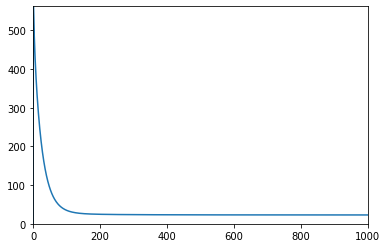

MSE: 17.7754


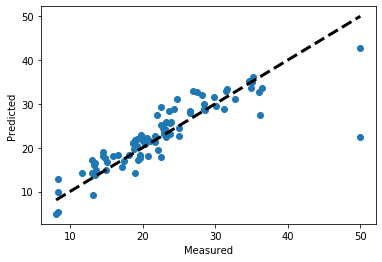

In [21]:
plt.plot(range(len(cost_history)), cost_history)
plt.axis([0, training_epochs, 0, np.max(cost_history)])
plt.show()

pred_y = sess.run(y_, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()